In [198]:
%pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [199]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import log_loss, accuracy_score
from utilities import load_data
from tqdm import tqdm

### Initialisation function

In [200]:
# init function
def inititialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    # store the param on a dict
    params = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }  
    return params

### model function

In [201]:
def forward_propagation(X, params):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    # ouput of the first layer
    Z1 = W1.dot(X) + b1
    A1 =  1 / (1+ np.exp(-Z1))
    
    # output of the second layer
    Z2 = W2.dot(A1) + b2
    A2 =  1 / (1+ np.exp(-Z2))
    
    # return activations fonction on a dict
    activations = {
        'A1': A1,
        'A2': A2
    }
    return activations

### Compute gradients

In [202]:
"""
    In this function we computes dz1, dw1, db1, dz2, dw2, db2
"""

def back_propagation(X, y, activations, params):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = params['W2']
    
    m = y.shape[1]
    
    # layer 2
    dZ2 = A2 - y
    # dW2 = 1 / m * np.dot(dZ2, A1.T)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    # layer 1
    dZ1 = np.dot(W2.T, dZ2) * A1*(1 - A1)
    # dW1 = 1 / m * np.dot(dZ2, X.T)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    # store gradients on a dict
    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,   
    }
    
    return gradients
    

### Update parameters

In [203]:
def update(gradient, params, learning_rates):
    
    # params
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    # gradients
    dW1 = gradient['dW1']
    db1 = gradient['db1']
    dW2 = gradient['dW2']
    db2 = gradient['db2']
    
    # use gradients algorithm tu update differents parameters of the model
    W1 = W1 - learning_rates * dW1
    b1 = b1 - learning_rates * db1
    W2 = W2 - learning_rates * dW2
    b2 = b2 - learning_rates * db2
    
    params = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    
    return params

### prediction function

In [204]:
def predict(X, params):
    activations = forward_propagation(X, params)
    
    A2 = activations['A2']
    return A2 >= 0.5
    

### train neural network model

In [205]:
def neural_network(X_train, y_train, X_test, y_test, n1=32, learning_rate = 0.01, n_iter = 10000): # n1 nbr of neuron in layer 1
    
    # initialisation
    n0 =  X_train.shape[0] # n0 :numbers of input that we have in X_train. don't forget that we use X_train.T
    n2 = y_train.shape[0]
    print("voici n2",n2)
    params = inititialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    # train model with algorithm of gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, params)
        A2 = activations['A2']
        activations_test = forward_propagation(X_test, params)
        A2_test = activations_test['A2']
        
        
        if i % 10 == 0:
            # train
            train_loss.append(log_loss(y_train, A2))
            y_pred = predict(X_train, params)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten()) 
            train_acc.append(current_accuracy)
            
            # test
            test_loss.append(log_loss(y_test, A2_test))
            y_pred = predict(X_test, params)
            current_accuracy_t = accuracy_score(y_test.flatten(), y_pred.flatten()) 
            test_acc.append(current_accuracy_t)

        # update
        gradients = back_propagation(X_train, y_train, activations, params)
        params = update(gradients, params, learning_rate)
    
    perf_train = predict(X_train, params)
    perf_test = predict(X_test, params)
    
    print("accuracy_score train:", accuracy_score(y_train.flatten(), perf_train.flatten()))
    print("accuracy_score test:", accuracy_score(y_test.flatten(), perf_test.flatten()))
            
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(test_loss, label="Test Loss")
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(train_acc, label="Train accuracy")
    plt.plot(test_acc, label="Test accuracy")
    plt.legend()
    plt.show()
    
    return params
    
            
    
    

dimension of x: (2, 100)
dimension of y: (1, 100)


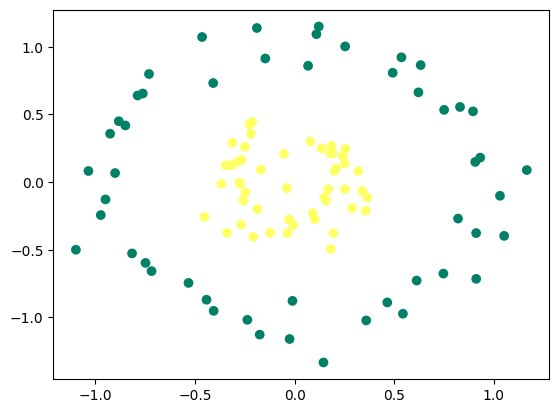

In [206]:
# @title Create dataset with 100 datas and 2 variable
X,y = make_circles(n_samples=100, noise=0.1 , factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

# displays x and y dimensions
print("dimension of x:", X.shape)
print("dimension of y:", y.shape)

plt.scatter(X[0,:], X[1,:], c=y, cmap="summer")

In [207]:
# params = neural_network(X, y, n1=2, learning_rate=0.1)

## Application

In [208]:
x_train, y_train, x_test, y_test = load_data()

### display data

/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/tmp/ipykernel_15098/2901901481.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


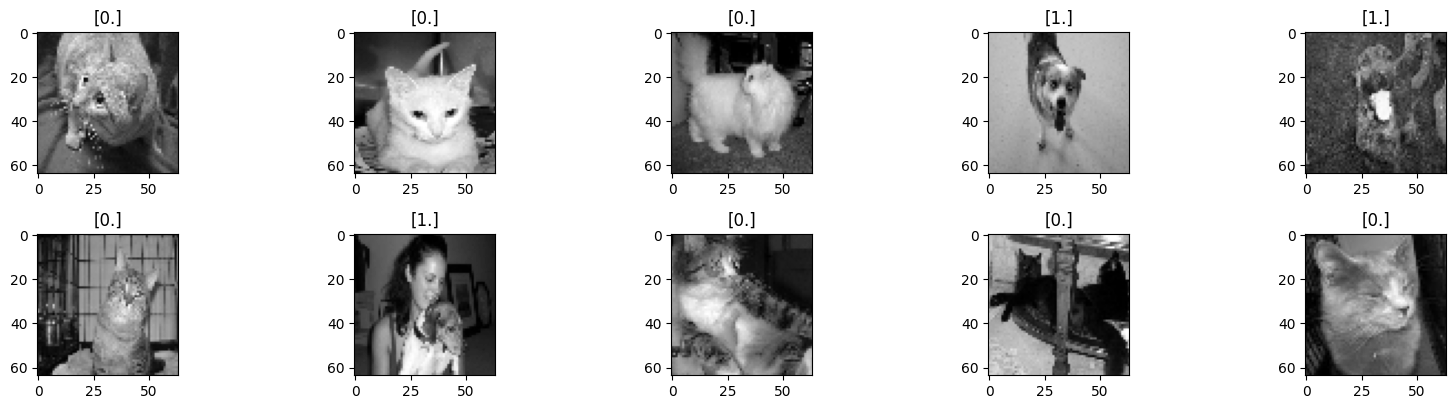

In [209]:
plt.figure(figsize=(16, 8))

for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [210]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)
(array([0., 1.]), array([500, 500]))


In [211]:
X_train = x_train.T
y_train = y_train.T
print(X_train.shape, y_train.shape)

(64, 64, 1000) (1, 1000)


In [212]:
X_test = x_test.T
y_test = y_test.T
print(X_test.shape, y_test.shape)

(64, 64, 200) (1, 200)


In [213]:
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_test.max()

print(X_train_reshape.shape)
print(X_test_reshape.shape)

(4096, 1000)
(4096, 200)


voici n2 1


  0%|          | 0/10000 [00:00<?, ?it/s]/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
  0%|          | 10/10000 [00:01<17:50,  9.33it/s]/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill re

  0%|          | 20/10000 [00:02<28:13,  5.89it/s]/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
  0%|          | 30/10000 [00:04<21:30,  7.72it/s]/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 th

accuracy_score train: 0.647
accuracy_score test: 0.525


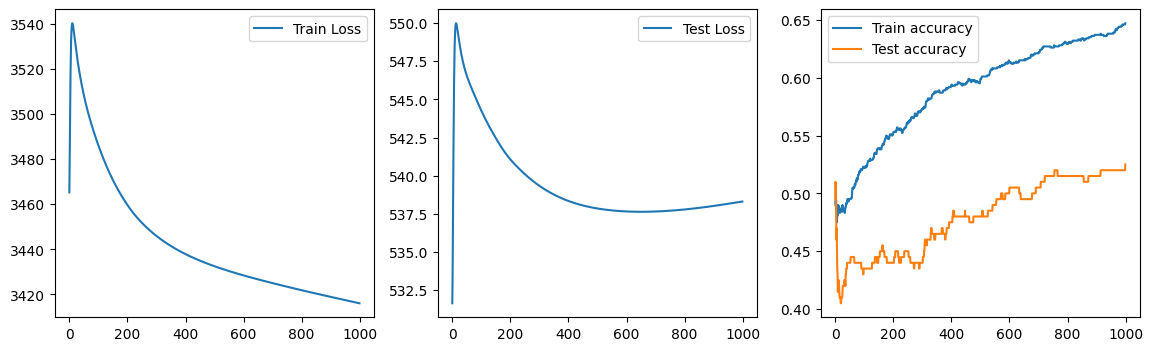

In [214]:
params = neural_network(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.01)